*Done* BY INDERJEET SINGH(22BIT70061) Rishabh Kumar(22BIT70062) Ishan Verma(22BIT70048)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = '/content/drive/My Drive/brain_tumor_dataset'

folders = os.listdir(dataset_path)
print(folders)


['yes', 'no']


In [ ]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

yes contains 155 images
no contains 98 images


In [ ]:
def load_images(folder):

    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels


In [ ]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((253, 128, 128), (253,))

In [ ]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)


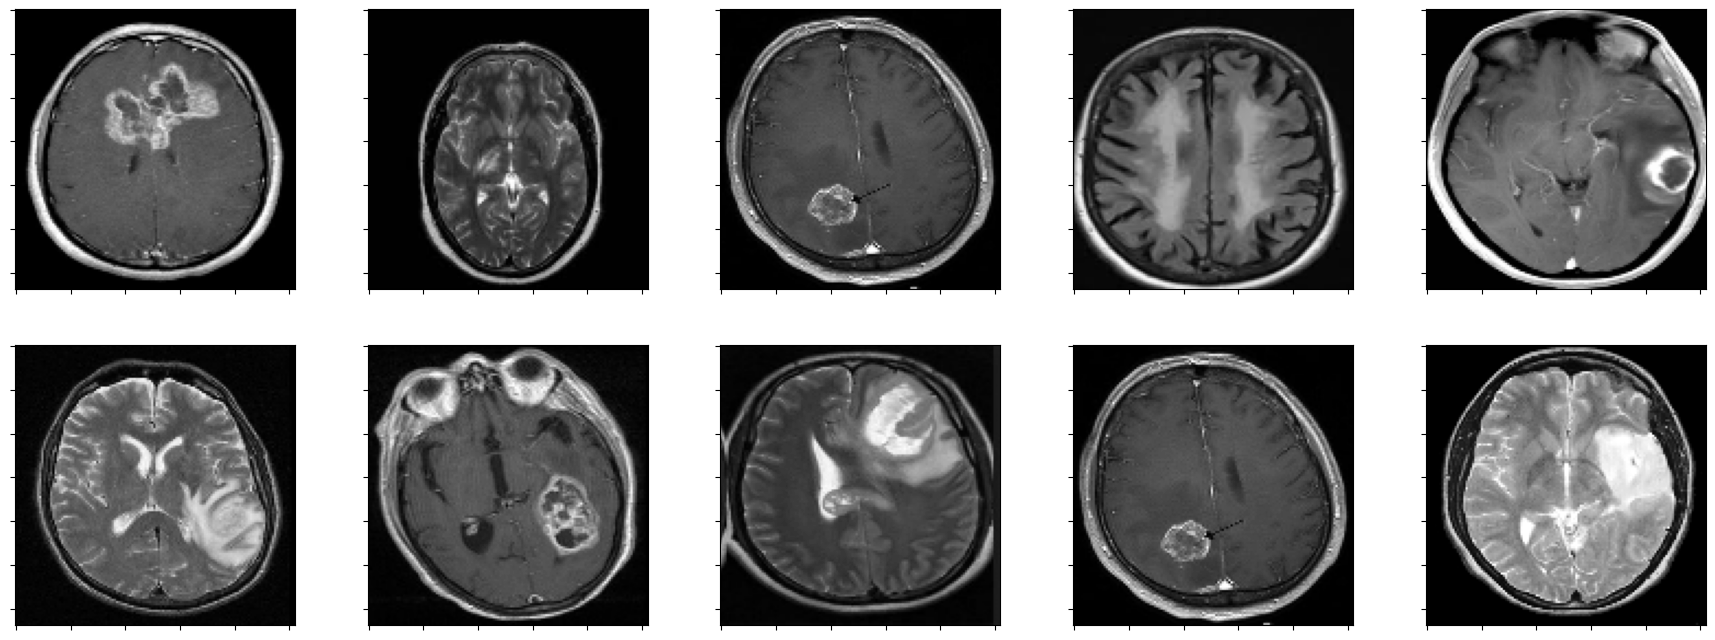

In [ ]:
plot_images(98,252)

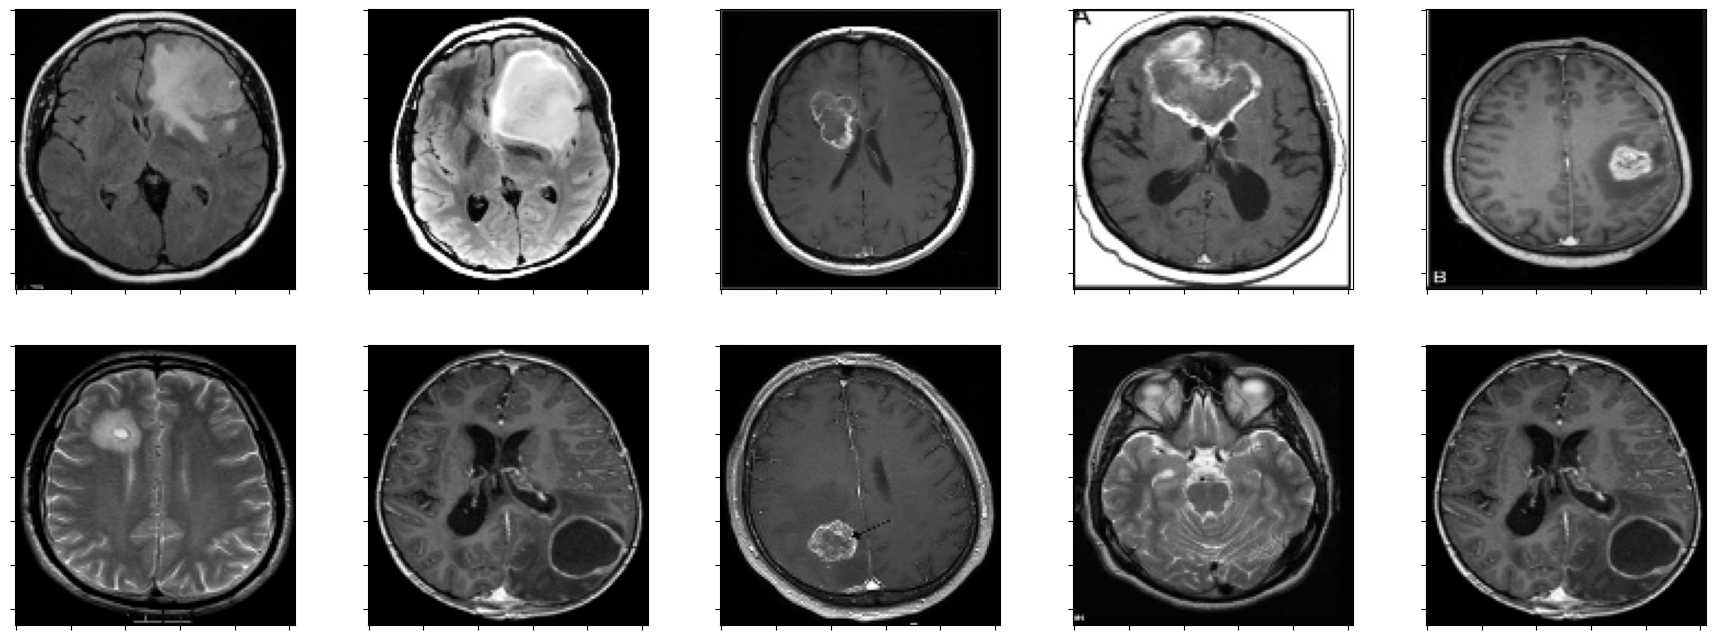

In [ ]:
plot_images(0,97)


In [ ]:
norm_data = data / 255.
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[1.        ],
         [0.98431373],
         [0.97254902],
         ...,
         [0.97254902],
         [0.96470588],
         [0.97647059]],
 
        [[0.94901961],
         [0.38823529],
         [0.17254902],
         ...,
         [0.19607843],
         [0.38431373],
         [0.99215686]],
 
        [[0.98039216],
         [0.30588235],
         [0.11372549],
         ...,
         [0.09019608],
         [0.32156863],
         [0.96078431]],
 
        ...,
 
        [[0.98039216],
         [0.30588235],
         [0.11372549],
         ...,
         [0.07843137],
         [0.31764706],
         [0.96862745]],
 
        [[0.94901961],
         [0.38823529],
         [0.17254902],
         ...,
         [0.18431373],
         [0.38039216],
         [0.99607843]],
 
        [[1.        ],
         [0.98431373],
         [0.97254902],
         ...,
         [0.96078431],
         [0.96078431],
         [0.98431373]]]))

In [ ]:
SEED = 40

In [ ]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history = model.fit(norm_data, labels, epochs = 10, validation_split = 0.20)

Epoch 1/10
7/7 [==============================] - 19s 3s/step - loss: 0.3687 - accuracy: 0.8416 - val_loss: 0.7572 - val_accuracy: 0.6863
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.4296 - accuracy: 0.7772 - val_loss: 1.0419 - val_accuracy: 0.4706
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.3637 - accuracy: 0.8317 - val_loss: 1.3822 - val_accuracy: 0.2745
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.3471 - accuracy: 0.8762 - val_loss: 0.8389 - val_accuracy: 0.5882
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 0.2857 - accuracy: 0.8762 - val_loss: 1.6780 - val_accuracy: 0.4902
Epoch 6/10
7/7 [==============================] - 18s 3s/step - loss: 0.2588 - accuracy: 0.8762 - val_loss: 1.1994 - val_accuracy: 0.6275
Epoch 7/10
7/7 [==============================] - 20s 3s/step - loss: 0.2030 - accuracy: 0.9109 - val_loss: 1.2577 - val_accuracy: 0.7451
Epoch 8/10
7/7 [==================

In [ ]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 74.31%
Loss: 0.5341


In [ ]:
np.random.seed(SEED)
indxs = np.random.randint(0, 252, 20)

In [ ]:
y_pred_prob = model.predict(norm_data[indxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[indxs]
y_pred.shape, y_true.shape

1/1 [==============================] - 0s 425ms/step


((20,), (20,))

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

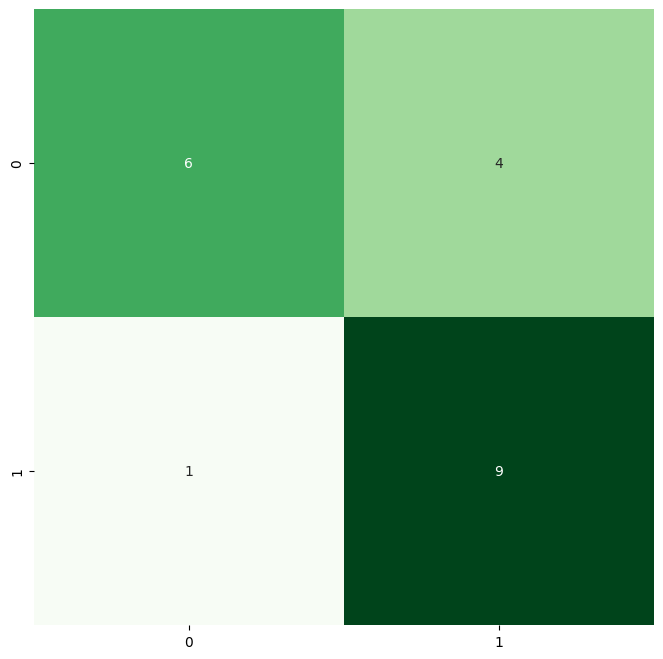

In [ ]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                   

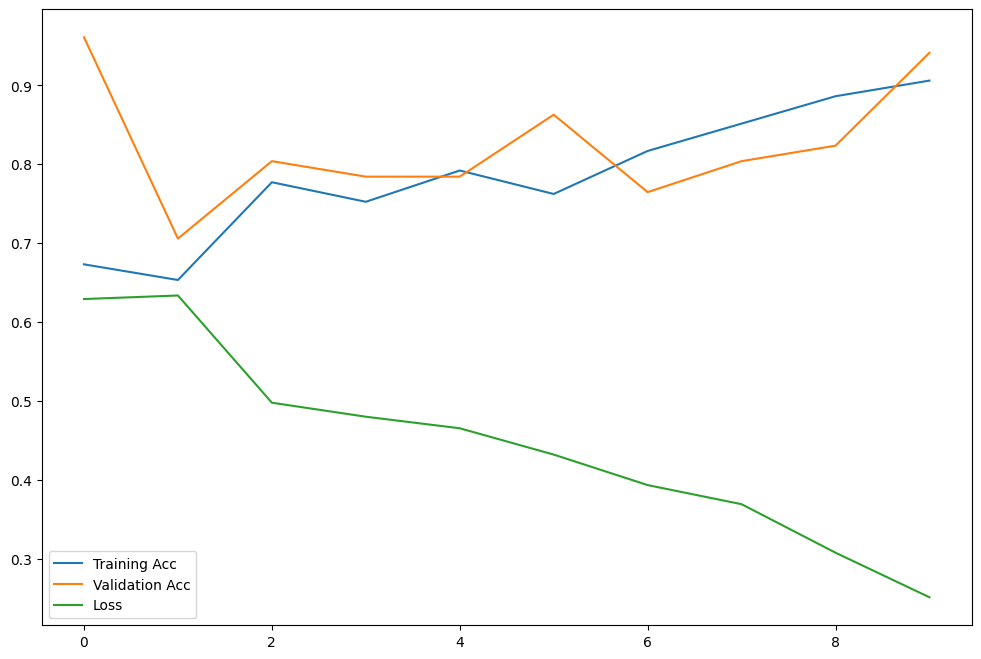

In [ ]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()